<a href="https://colab.research.google.com/github/ctk03272/deeplearningstudy/blob/main/%08chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4. 이번 장의 주제는 신경망 학습

- 학습이란 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 손실 함수 -> 신경망이 학습할 수 있도록 해주는 지표

4.1 데이터에서 학습한다.

- 신경망의 특징은 데이터를 보고 학습 -> 가중치 매개변수의 값을 데이터를 보고 자동으로 결정

4.1.1 데이터 주도 학습

- 기계학습의 중심은 데이터
- 이미지에서 특징을 추출하고 그 특징의 패턴을 기계학습 기술로 학습할 수 있다.
- 데이터로부터 규칙을 찾아내는 역할을 '기계'를 담당
- 신경망은 이미지를 '있는 그대로' 학습한다
- 신경망은 종단간 기계학습이다.

4.1.2 훈련 데이터와 시험 데이터

- 기계학습 문제는 데이터를 훈련 데이터와 시험 데이터로 나눈다.
- 훈련 데이터로 최적의 매개변수를 찾아서 시험데이터로 모델의 실력을 평가한다.
- 나누는 이유는 범용 능력을 제대로 평가하기 위해 -> 범용능력이란 아직 보지 못한 데이터도 풀어내는 능력
- 데이터셋 하나로만 학습과 평가를 하면 오버피팅이 어날 수 있음

4.2. 손실 함수
- 신경망은 현재의 상태를 '하나의 지표'로 표현한다. -> 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수를 찾는다
- 이 하나의 지표를 손실함수라고 한다.

4.2.1 오차제곱합
- 가장 많이 쓰이는 손실 함수는 오차제곱합
- 원-핫 인코딩이란? -> 한 원소만 1로하고 그 외는 0으로

In [ ]:
import numpy as np

def sum_squares_error(y,t):
  return 0.5 & np.sum((y-t)**2)\

4.2.2 교차 엔트로피 오차
- 또 다른 손실함수로는 교차 엔트로피 오차

In [ ]:
def cross_entropy_error(y,t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))

4.2.3 미니 배치 함수

- 너무 많은 데이터를 대상으로 손실함수를 구하는것은 시간도 오래 걸리고 현실적이지 않다. 그렇기에 데이터의 일부를 추려 전체의 근사치로 이요할 수 있습니다. 이 일부를 미니배치 라고 한다. 그리고 이러한 학습을 미니배치 학습이라고 한다.

In [10]:
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=False, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

4.2.4. 교타 엔트로피 오차 구현하기

In [13]:
def cross_entropy_error(y,t):
  if y.dim ==1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arrange(batch_size),t]+1e-7))/batch_size


4.2.5 왜 손실 함수를 설정하였는가?
- 신경망 학습시 정확도를 지표로 삼아서는 안되는 이유는 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.

4.3 수치 미분
이후 미분 편미분에 관한 내용은 너무 기본적인 수학 내용이라 생략.

0.1999999999990898


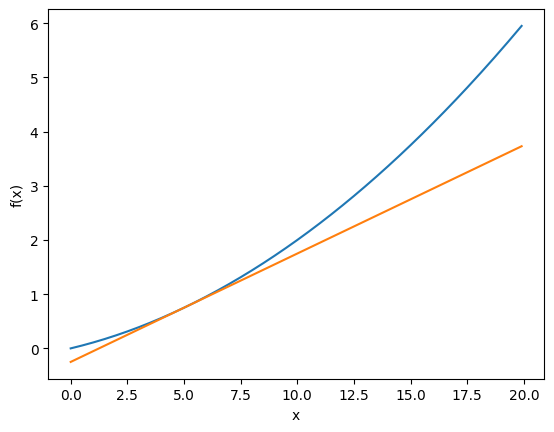

In [14]:
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [18]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.42124508  0.1419306  -0.56317568]
 [ 0.63186762  0.2128959  -0.84476352]]


4.5 학습 알고리즘 구현하기
- 전제 -> 미니배치 -> 기울기 산출 -> 매개변수 갱신
- 경사하강법이며, 미니배치 이기 때문에 확률적 경사하강법이라고 한다.

In [19]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.7956, 0.7996
train acc, test acc | 0.8773166666666666, 0.8829
train acc, test acc | 0.8977, 0.9015
train acc, test acc | 0.9079666666666667, 0.911
train acc, test acc | 0.9140666666666667, 0.9181
train acc, test acc | 0.9188666666666667, 0.9215
train acc, test acc | 0.9237833333333333, 0.9251
train acc, test acc | 0.92695, 0.9288
train acc, test acc | 0.9297833333333333, 0.9316
train acc, test acc | 0.93305, 0.9335
train acc, test acc | 0.9361166666666667, 0.9362
train acc, test acc | 0.9388333333333333, 0.9387
train acc, test acc | 0.9406833333333333, 0.9398
train acc, test acc | 0.9424333333333333, 0.9415
train acc, test acc | 0.9448166666666666, 0.9427
train acc, test acc | 0.94665, 0.9448


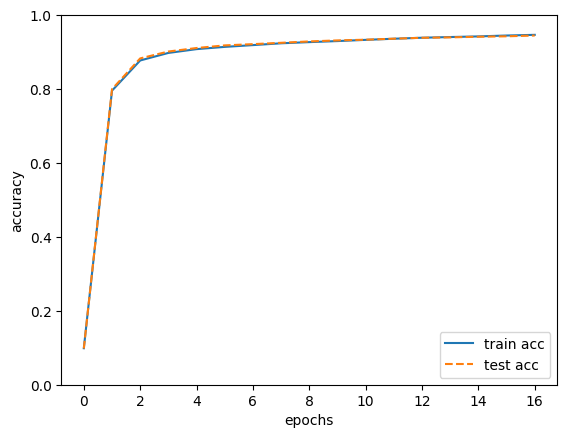

In [21]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()